<a href="https://colab.research.google.com/github/jyotidabass/Binary-dog-cat-classification-/blob/main/Binary(dogs_cats)classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dog or Cat**?
In this notebook, I will create a neural network that determines whether an image is of a cat or a dog. The dataset I use is taken from Kaggle, and I only use 10% of the 20000 images to create my model.

In [ ]:
import os
import zipfile
import shutil

First we need to get the zip files containing the training,validation and testing images from github. We do that by using !git clone

In [ ]:
!git clone https://github.com/sidd3103/Cats-vs-Dogs.git

Cloning into 'Cats-vs-Dogs'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 33 (delta 11), reused 0 (delta 0), pack-reused 10
Unpacking objects: 100% (33/33), done.


Next, we unzip the files, delete the __MACOSX files and .DS_Store files that are created and hidden when we zip files on mac. We do all this using the OS, Shutil libraries.

In [ ]:
local_zip = 'Cats-vs-Dogs/train.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('Cats-vs-Dogs/train')
zip_ref.close()
shutil.rmtree('Cats-vs-Dogs/train/__MACOSX')

In [ ]:
local_zip = 'Cats-vs-Dogs/validation.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('Cats-vs-Dogs/validation')
zip_ref.close()
shutil.rmtree('Cats-vs-Dogs/validation/__MACOSX')

In [ ]:
local_zip = 'Cats-vs-Dogs/test.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('Cats-vs-Dogs/test')
zip_ref.close()
shutil.rmtree('Cats-vs-Dogs/test/__MACOSX')

In [ ]:
os.remove('Cats-vs-Dogs/test.zip')
os.remove('Cats-vs-Dogs/train.zip')
os.remove('Cats-vs-Dogs/validation.zip')

The following code snippet removes the hidden .DS_Store files. 
Snippet taken from : https://gist.github.com/mattsparks/19a0911999a623a3c302cc29c96b293a

In [ ]:
import glob
os.chdir('/content/Cats-vs-Dogs')
for root, dirs, files in os.walk('/'):
  i = 0
  for file in files:
    if file.endswith('.DS_Store'):
      path = os.path.join(root, file)
      if os.remove(path):
        pass
      else:
        i += 1

Now we create paths to the directories from where our ImageDataGenerator will take images for training,validation and testing.

In [ ]:
base_dir = os.path.join('/content','Cats-vs-Dogs')
train_directory = os.path.join((os.path.join(base_dir,'train')),'train')
test_directory = os.path.join((os.path.join(base_dir,'test')),'test')
validation_directory = os.path.join((os.path.join(base_dir,'validation')),'validation')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

Our next step is to create our ImageDataGenerators using keras. Before training our model, images require preprocessing. Currently our images exist as JPEG files. We need to : 


1.   Decode these images to RGB grid of pixels. 
2.   Convert these pixels to floating-point tensors so that they can be fed into the neural network.
3.   Rescale pixels to have a value between 0 and 1.

Thankfully, all these tasks can be done using ImageDataGenerators from the keras library.


In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)
train_generator = datagen.flow_from_directory(train_directory,
                                              target_size = (150,150),
                                              batch_size = 20,
                                              class_mode = 'binary')

validation_generator = datagen.flow_from_directory(validation_directory,
                                              target_size = (150,150),
                                              batch_size = 20,
                                              class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from keras import layers
from keras import models

We define our model in the next code block.

In [ ]:
model = models.Sequential()
#First convolutional layer with 32 3x3 filters
model.add(layers.Conv2D(32, (3, 3), activation='relu',
      input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

#Second convolutional layer with 64 3x3 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Third convolutional layer with 128 3x3 filters
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Fourth convolutional layer with 128 3x3 filters
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Fifth convolutional layer with 128 3x3 filters
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#We flatten our final feature map and add a hidden dense layer with 512 neurons
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

#Our output layer
model.add(layers.Dense(1, activation='sigmoid'))

Since we are tackling a binary classification problem, our output layer is of size 1 and activation 'sigmoid'. The network will give us a single probability ***p*** and since there are only two classes, the two probabilities will be ***p*** and ***1-p***.



Let's print out a summary of our model.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras import optimizers

Now we compile and fit our model. Since it is a binary classification problem, we use 'binary_crossentropy' as our loss function and RMSprop as our optimizer with a learning rate of 0.0001. 
Since our data generator takes images in batches of 20, and we have 2000 training images, the number of steps per epoch should be 2000/20 = 100 

In [ ]:
from tensorflow import keras
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [ ]:
result = model.fit(
train_generator,
steps_per_epoch=100,
epochs=40,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/40
100/100 [==============================] - 22s 91ms/step - loss: 0.6926 - acc: 0.5080 - val_loss: 0.6887 - val_acc: 0.5470
Epoch 2/40
100/100 [==============================] - 9s 94ms/step - loss: 0.6831 - acc: 0.5570 - val_loss: 0.6709 - val_acc: 0.5840
Epoch 3/40
100/100 [==============================] - 9s 91ms/step - loss: 0.6663 - acc: 0.5980 - val_loss: 0.6663 - val_acc: 0.5800
Epoch 4/40
100/100 [==============================] - 9s 94ms/step - loss: 0.6439 - acc: 0.6215 - val_loss: 0.6372 - val_acc: 0.6240
Epoch 5/40
100/100 [==============================] - 9s 91ms/step - loss: 0.6198 - acc: 0.6530 - val_loss: 0.6249 - val_acc: 0.6430
Epoch 6/40
100/100 [==============================] - 10s 96ms/step - loss: 0.5827 - acc: 0.6980 - val_loss: 0.6257 - val_acc: 0.6410
Epoch 7/40
100/100 [==============================] - 9s 90ms/step - loss: 0.5622 - acc: 0.7070 - val_loss: 0.6135 - val_acc: 0.6620
Epoch 8/40
100/100 [==============================] - 9s 90ms/step 

Let's visualise these results using matplotlib.


In [ ]:
import matplotlib.pyplot as plt

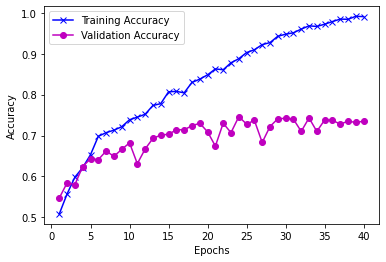

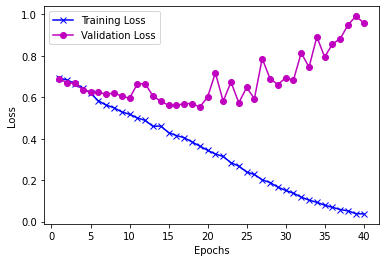

In [ ]:
acc = result.history['acc']
loss = result.history['loss']
validation_acc = result.history['val_acc']
validation_loss = result.history['val_loss']

x = range(1,len(acc)+1)

plt.plot(x,acc,'x-b',label = 'Training Accuracy')
plt.plot(x,validation_acc,'o-m',label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.plot(x,loss,'x-b',label = 'Training Loss')
plt.plot(x,validation_loss,'o-m',label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As we can see, the training accuracy increases linearly until it reaches close to 100% whereas the validation accuracy stalls close to 70%. 

Similary, the training loss falls with every epoch while the validation loss reaches it's minimum somewhere between the 6th-8th epoch, after which it starts increasing.

These plots are characteristic of intense overfitting. This is to be expected since our dataset is so small, comprising of only 2000 training images. It's 10% of the original dataset from Kaggle, which contains 20000 training images. 

#Data Augmentation 
We tackle this intense overfitting by using data augmentation. Data augmentation refers to generating more training data from existing data by applying a transformation to the original images such that the result is also the same category of image. 




In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode = 'nearest')

In [ ]:
train_generator_with_aug = train_datagen.flow_from_directory(train_directory,
                                                    batch_size = 20,
                                                    target_size = (150,150),
                                                    class_mode = 'binary')

validation_generator = datagen.flow_from_directory(validation_directory,
                                                   batch_size = 20,
                                                   target_size = (150,150),
                                                   class_mode = 'binary')

result_aug = model.fit(train_generator_with_aug,
                       steps_per_epoch = 100,
                       epochs =50,
                       validation_data = validation_generator,
                       validation_steps = 50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
100/100 [==============================] - 17s 171ms/step - loss: 0.8067 - acc: 0.6835 - val_loss: 0.6501 - val_acc: 0.6800
Epoch 2/50
100/100 [==============================] - 17s 170ms/step - loss: 0.6075 - acc: 0.6895 - val_loss: 0.5967 - val_acc: 0.6900
Epoch 3/50
100/100 [==============================] - 17s 170ms/step - loss: 0.5708 - acc: 0.7055 - val_loss: 0.5162 - val_acc: 0.7500
Epoch 4/50
100/100 [==============================] - 17s 171ms/step - loss: 0.5635 - acc: 0.7100 - val_loss: 0.5473 - val_acc: 0.7230
Epoch 5/50
100/100 [==============================] - 17s 171ms/step - loss: 0.5429 - acc: 0.7335 - val_loss: 0.5198 - val_acc: 0.7400
Epoch 6/50
100/100 [==============================] - 17s 170ms/step - loss: 0.5513 - acc: 0.7245 - val_loss: 0.5456 - val_acc: 0.7310
Epoch 7/50
100/100 [==============================] - 17s 170ms/step - loss: 0.5341 - acc: 0.7290 - val_lo

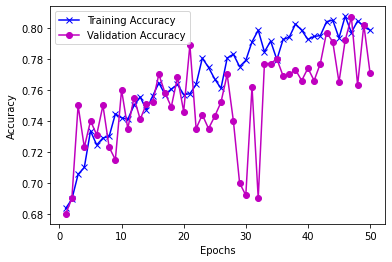

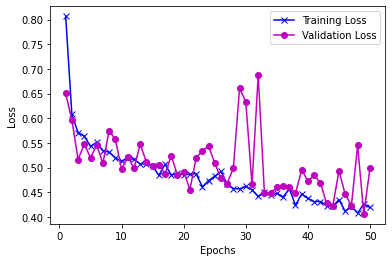

In [ ]:
acc = result_aug.history['acc']
loss = result_aug.history['loss']
validation_acc = result_aug.history['val_acc']
validation_loss = result_aug.history['val_loss']

x = range(1,len(acc)+1)

plt.plot(x,acc,'x-b',label = 'Training Accuracy')
plt.plot(x,validation_acc,'o-m',label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.plot(x,loss,'x-b',label = 'Training Loss')
plt.plot(x,validation_loss,'o-m',label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Clearly, we are no longer overfitting because of a larger training sample due to data augmentation. The validation curves are closely tracking the training curves for the most part, with some hiccups in between.

The accuracy reaches to about 82%, which is almost a 17% increase from our previous accuracy without augmentation.

#Using a Pre-Trained Model (Feature Extraction)
We can further improve our accuracy by using a pretrained model such as ResNet50, VGG16, VGG19, etc. 
Each convolutional neural network has two parts : 

1. The **convulational base** consisting of the pooling and convolutional layers. 
2. The **densely connected classifier** that sits on top of the convolutional base

We just need to take the convulational base of the pre-trained network and add it on top of our classifier.
The patterns and features learned by the convolutional base are more generic and hence more reusable. The classifier, on the other hand, recognises and learns local patterns in the dataset. Hence, we avoid using the classifier of the pretrained model and use only the convolutional base instead.



The VGG16 model was trained on the ImageNet dataset which contains many images of dogs and cats, so we can use the classifier as well. But to have a more generic model, we won't use it and build our own classifier.

In [ ]:
#from tensorflow.keras.applications.vgg16 import VGG
from tensorflow.keras.applications import VGG16

In [ ]:
vgg16_base = VGG16(include_top = False,
                   weights = 'imagenet',
                   input_shape = (150,150,3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

Before compiling and training the model, we have to freeze the convolutional base. If we don't do this, the patterns that were previously learned by the model would be updated during the training. 

In [ ]:
#Freezing the convoutional base
vgg16_base.trainable = False

In [ ]:
new_model = models.Sequential()
new_model.add(vgg16_base)
new_model.add(layers.Flatten())
new_model.add(layers.Dense(256,activation = 'relu'))
new_model.add(layers.Dense(1,activation = 'sigmoid'))

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
new_model.compile(optimizer = keras.optimizers.RMSprop( learning_rate= 2e-5),
                  loss = 'binary_crossentropy',
                  metrics = 'acc')

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode = 'nearest')

train_generator_vgg16 = train_datagen.flow_from_directory(train_directory, 
                                                          target_size = (150,150),
                                                          batch_size = 20,
                                                          class_mode = 'binary')

validation_generator = datagen.flow_from_directory(validation_directory,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
result_vgg16 = new_model.fit(train_generator_vgg16,
                       steps_per_epoch = 100,
                       epochs =50,
                       validation_data = validation_generator,
                       validation_steps = 50)

Epoch 1/50
100/100 [==============================] - 22s 194ms/step - loss: 0.5945 - acc: 0.6820 - val_loss: 0.4846 - val_acc: 0.7780
Epoch 2/50
100/100 [==============================] - 19s 194ms/step - loss: 0.4972 - acc: 0.7735 - val_loss: 0.3840 - val_acc: 0.8470
Epoch 3/50
100/100 [==============================] - 21s 210ms/step - loss: 0.4347 - acc: 0.8110 - val_loss: 0.3386 - val_acc: 0.8680
Epoch 4/50
100/100 [==============================] - 19s 194ms/step - loss: 0.4047 - acc: 0.8215 - val_loss: 0.3189 - val_acc: 0.8750
Epoch 5/50
100/100 [==============================] - 19s 192ms/step - loss: 0.3898 - acc: 0.8275 - val_loss: 0.3094 - val_acc: 0.8710
Epoch 6/50
100/100 [==============================] - 19s 191ms/step - loss: 0.3798 - acc: 0.8400 - val_loss: 0.2877 - val_acc: 0.8850
Epoch 7/50
100/100 [==============================] - 19s 191ms/step - loss: 0.3581 - acc: 0.8455 - val_loss: 0.2816 - val_acc: 0.8860
Epoch 8/50
100/100 [==============================] - 1

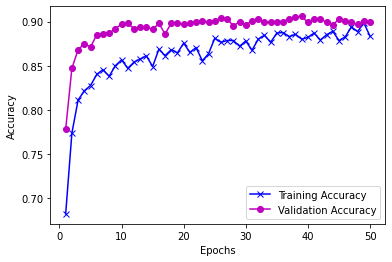

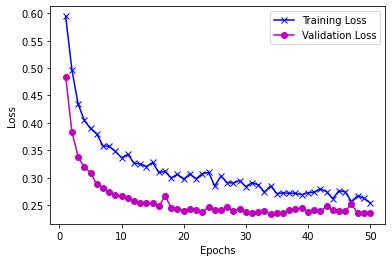

In [ ]:
acc = result_vgg16.history['acc']
loss = result_vgg16.history['loss']
validation_acc = result_vgg16.history['val_acc']
validation_loss = result_vgg16.history['val_loss']

x = range(1,len(acc)+1)

plt.plot(x,acc,'x-b',label = 'Training Accuracy')
plt.plot(x,validation_acc,'o-m',label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.plot(x,loss,'x-b',label = 'Training Loss')
plt.plot(x,validation_loss,'o-m',label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Our training accuracy reaches upto 88% while our validation accuracy reaches almost 90%. Similarly, our training loss is more than our validation loss for every epoch. That's unusual to see. 

Usually we see this when we apply regularization techniques to our model such as adding a dropout layer. The dropout layer gets applied to training images but not the validation images.

But it is not the case here. It might be because the weights of VGG16 convolutional base recognise the patterns in validation images better than in the training images.

#Fine Tuning
Fine tuning consists of unfreezing a few of the top layers of the convolutional base and training those layers after our classifier has already been trained. If the classifier hasn't already been trained, the patterns learned by the layers being fine-tuned will be destroyed.

In [ ]:
vgg16_base.trainable = True
for layer in vgg16_base.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False

In [ ]:
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
new_model.compile(loss='binary_crossentropy',
optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
metrics='acc')

In [ ]:
result_fine_tune = new_model.fit(train_generator_vgg16,
                                 steps_per_epoch = 100,
                                 epochs = 20,
                                 validation_data = validation_generator,
                                 validation_steps = 50)

Epoch 1/20
100/100 [==============================] - 21s 200ms/step - loss: 0.2840 - acc: 0.8785 - val_loss: 0.2198 - val_acc: 0.9120
Epoch 2/20
100/100 [==============================] - 21s 207ms/step - loss: 0.2475 - acc: 0.8895 - val_loss: 0.2249 - val_acc: 0.9130
Epoch 3/20
100/100 [==============================] - 20s 197ms/step - loss: 0.2302 - acc: 0.9070 - val_loss: 0.2182 - val_acc: 0.9110
Epoch 4/20
100/100 [==============================] - 20s 197ms/step - loss: 0.2041 - acc: 0.9135 - val_loss: 0.1999 - val_acc: 0.9200
Epoch 5/20
100/100 [==============================] - 20s 198ms/step - loss: 0.1955 - acc: 0.9215 - val_loss: 0.2386 - val_acc: 0.9080
Epoch 6/20
100/100 [==============================] - 20s 197ms/step - loss: 0.1815 - acc: 0.9215 - val_loss: 0.1895 - val_acc: 0.9290
Epoch 7/20
100/100 [==============================] - 20s 196ms/step - loss: 0.1626 - acc: 0.9320 - val_loss: 0.2087 - val_acc: 0.9180
Epoch 8/20
100/100 [==============================] - 2

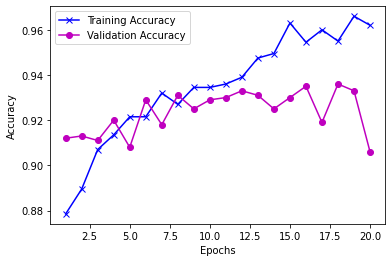

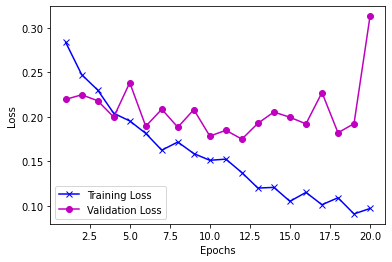

In [ ]:
acc = result_fine_tune.history['acc']
loss = result_fine_tune.history['loss']
validation_acc = result_fine_tune.history['val_acc']
validation_loss = result_fine_tune.history['val_loss']

x = range(1,len(acc)+1)

plt.plot(x,acc,'x-b',label = 'Training Accuracy')
plt.plot(x,validation_acc,'o-m',label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.plot(x,loss,'x-b',label = 'Training Loss')
plt.plot(x,validation_loss,'o-m',label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As we can see, our validation accuracy has increased to almost 94% by fine-tuning our model. This is a really good accuracy considering we are working with only 2000 training images. There is still overfitting a lot of room to improve our model but for now, let's test this model on completely unseen data. 

In [ ]:
test_generator = datagen.flow_from_directory(
test_directory,
target_size=(150, 150),
batch_size = 25,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
test_loss, test_accuracy = new_model.evaluate(test_generator, steps=40)
print('test accuracy: ' + str(test_accuracy*100) + '%')

40/40 [==============================] - 5s 84ms/step - loss: 0.3003 - acc: 0.9130
test accuracy: 91.29999876022339%


We get an accuracy of almost 94% on our test sample. 

Try out the model by uploading cat or dog images from your local machine by running the next two cells.

In [ ]:
if os.getcwd() != '/content':
  os.chdir('/content')

In [ ]:

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  probability = new_model.predict(images, batch_size=10)
  if probability > 0.5:
    print('Image is of a dog.')
  elif probability < 0.5:
    print('Image is of a cat.')
  else:
    print('Image is ambiguous. ')
  os.remove(path)

Saving 24459750_eb49f6e4cb_m.jpg to 24459750_eb49f6e4cb_m.jpg
Image is of a dog.
